In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'epoch-scalability': '../results/epoch-scalability'
}

prefix = 'time'
experiments = {k:{} for k in paths}

In [4]:
def process_time(file):
    with open(file) as time_file:
        lines = time_file.readlines()
        """        lines = [line.strip() for line in lines if len(line) > 2]
        times = {
            'sys':[line for line in lines if 'sys' in line],
            'user' : [line for line in lines if 'user' in line],
            'real': [line for line in lines if 'real' in line]
        }
        
        for key in times:
            values = times[key]
            values = [v.split('\t')[1] for v in values]
            values = [float(v.split('m')[0])*60 + float(v.split('m')[1][:-1].replace(',', '.')) for v in values]
            times[key] = values"""
    return [int(time) for time in lines]
#process_time("/home/dcandrade/Documents/Subjects/Computação de Alto Desempenho/hpc-facial-expression-recognition/results/size-scalability/500/time.txt")

In [5]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                #subtype_files.append(pd.read_csv(experiment_file, header=0))
                experiments[experiment_type][subtype] = process_time(experiment_file)

In [9]:
size_df = pd.DataFrame(experiments['size-scalability']).transpose().rename(index=int).sort_index()
epochs_df = pd.DataFrame(experiments['epoch-scalability']).transpose().rename(index=int)

In [10]:
size_df = pd.DataFrame(size_df.apply(sorted, axis=1))
size_df = size_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'}).sort_index()
size_df

,Tempo (s)
977,"[74257, 74298, 75032]"
1955,"[101246, 101322, 101682]"
3910,"[150547, 150879, 151258]"
7820,"[261397, 262354, 268021]"
15640,"[602333, 607415, 617338]"


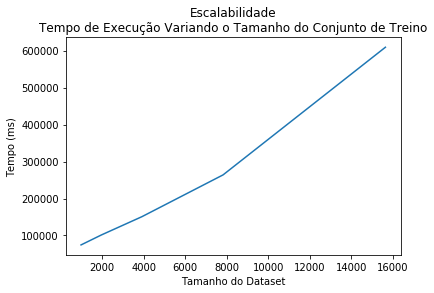

In [11]:
plot = size_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Tamanho do Conjunto de Treino")
plot.set_xlabel("Tamanho do Dataset")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['size-scalability']+"/size-scalability.eps", format='eps')

In [12]:
stats = size_df.applymap(pd.np.average)
stats['std'] = size_df.applymap(pd.np.std)
stats.index

Int64Index([977, 1955, 3910, 7820, 15640], dtype='int64')

In [13]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(pd.np.array(stats.index.tolist()).reshape(-1, 1),stats['Tempo (s)'])
model.coef_

array([36.42418304])

In [14]:
epochs_df = pd.DataFrame(epochs_df.apply(sorted, axis=1))
epochs_df = epochs_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'}).sort_index()
epochs_df

,Tempo (s)
50,"[190951, 191261, 191420]"
100,"[327608, 329937, 330136]"
200,"[588964, 589552, 599870]"
400,"[1154381, 1159743, 1188534]"
800,"[123175, 123212, 123366]"


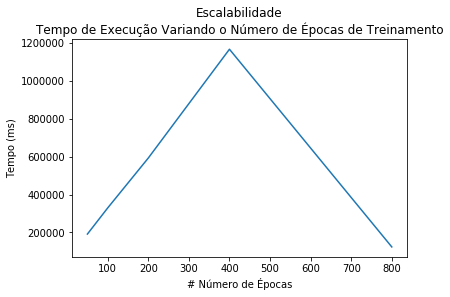

In [15]:
plot = epochs_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Número de Épocas de Treinamento")
plot.set_xlabel("# Número de Épocas")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['epoch-scalability']+"/epoch-scalability.eps", format='eps')

In [16]:
stats = epochs_df.applymap(pd.np.average)
stats['std'] = epochs_df.applymap(pd.np.std)
stats

,Tempo (s),std
50,1.912107e+05,194.748271
100,3.292270e+05,1147.684916
200,5.927953e+05,5008.300932
400,1.167553e+06,14996.666793
800,1.232510e+05,82.708323
